# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Score de Crédito dos Clientes

O contexto do projeto é que nós estamos trabalhando em um banco e queremos definir o score de crédito dos clientes.

Precisamos analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom

Passo a passo do projeto:

1) Carregar a base de dados

2) Analisar a base. (Ex: Ver o tamanho da base, número de colunas, tipo das colunas, medidas resumo, presença ou não de valor faltante.)

3) Limpar a base de dados.

4) Visualizar os dados

5) Analisar o perfil dos pagadores

6) Dividir a base em conjunto de treino e teste

7) Ajustar modelos de aprendizagem supervisionada para classificação

8) Escolher um dos modelos, atravéz de uma medida de acerto e com o conjunto de teste

9) Usar o modelo nos novos clientes


In [1]:
#Passo 1: importar a base
import pandas as pd
clientes = pd.read_csv('clientes.csv')

In [2]:
#Passo 2: visualização inicial da base
clientes

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

Vemos que temos uma base de dados com 10000 linhas, 25 colunas e nenhum valor faltante.

Queremos ajustar um modelo para prever o score de crédito dos clientes, assim, score_credito é a nossa variável resposta. Para os modelos possíveis a se ajustar, as covariáveis precisam estar com um tipo numérico, e temos três como "objeto", que são profissao, mix_credito, comportamento_pagamento.

In [4]:
clientes.describe()

,id_cliente,mes,idade,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,25982.666640,4.500000,33.316340,50505.123449,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,...,1426.220376,32.285173,221.220460,55.101315,392.697586,0.305600,0.511760,0.311040,0.31728,0.31040
std,14340.543051,2.291299,10.764812,38299.422093,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,...,1155.129026,5.116875,99.680716,39.006932,201.652719,0.460663,0.499864,0.462921,0.46542,0.46266
min,1006.000000,1.000000,14.000000,7005.930000,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,...,0.230000,20.000000,1.000000,0.000000,0.007760,0.000000,0.000000,0.000000,0.00000,0.00000
25%,13664.500000,2.750000,24.000000,19342.972500,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,...,566.072500,28.052567,144.000000,27.959111,267.615983,0.000000,0.000000,0.000000,0.00000,0.00000
50%,25777.000000,4.500000,33.000000,36999.705000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,...,1166.155000,32.305784,219.000000,45.156550,333.865366,0.000000,1.000000,0.000000,0.00000,0.00000
75%,38385.000000,6.250000,42.000000,71683.470000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,...,1945.962500,36.496663,302.000000,71.295797,463.215683,1.000000,1.000000,1.000000,1.00000,1.00000
max,50999.000000,8.000000,56.000000,179987.280000,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,...,4998.070000,50.000000,404.000000,434.191089,1183.930696,1.000000,1.000000,1.000000,1.00000,1.00000


A função describe acima mostra as medidas resumo de posição e dispersão das colunas que são do tipo numérico.

A variável id do cliente é um identificador do cliente, que é dado a ele sem ter nenhuma relação com as demais variáveis, assim seria adequado excluir essa coluna.

Vemos acuma que a variável salario_anual tem um desvio padrão muito alto, com a média e a mediana sendo bem diferentes e com o valor máximo estando muito acima do terceiro quartil, um indicativo de que provavelmente há outliers nessa base, para essa variável.

Isso parece acontecer com a divida total e com o investimento mensal.

Como a base não possui valor faltante, a limpeza dos dados fica facilatada. Precisamos apenas mudar o tipo das variáveis "object" para algo numérico.

In [5]:
#limpeza da base
clientes['profissao'].unique()

array(['cientista', 'professor', 'engenheiro', 'empresario',
       'desenvolvedor', 'advogado', 'gerente_midia', 'medico',
       'jornalista', 'gerente', 'contador', 'musico', 'mecanico',
       'escritor', 'arquiteto'], dtype=object)

In [6]:
clientes['mix_credito'].unique()

array(['Bom', 'Normal', 'Ruim'], dtype=object)

In [7]:
clientes['comportamento_pagamento'].unique()

array(['alto_gasto_pagamento_baixos', 'baixo_gasto_pagamento_alto',
       'baixo_gasto_pagamento_medio', 'baixo_gasto_pagamento_baixo',
       'alto_gasto_pagamento_medio', 'alto_gasto_pagamento_alto'],
      dtype=object)

In [8]:
#Vamos transformar em numérico cada variável

from sklearn.preprocessing import LabelEncoder

codificador = LabelEncoder() #Transforma texto em número, começando do 0


for coluna in clientes.columns:
    if clientes[coluna].dtype == "object" and coluna != "score_credito":
        clientes[coluna] = codificador.fit_transform(clientes[coluna])

In [9]:
clientes['profissao'].unique()

array([ 2, 14,  6,  5,  4,  0,  9, 12, 10,  8,  3, 13, 11,  7,  1])

In [10]:
clientes['mix_credito'].unique()

array([0, 1, 2])

In [11]:
clientes['comportamento_pagamento'].unique()

array([1, 3, 5, 4, 2, 0])

Continuando, vamos fazer algumas visualizações de dados que nos ajudem com o nosso objetivo.

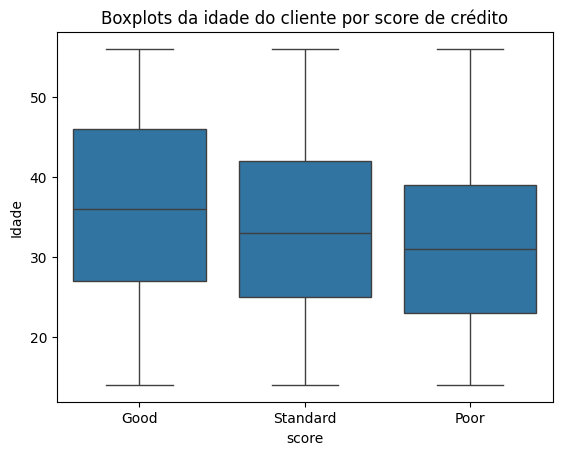

In [12]:
#Passo 4, visualização de dados
#Boxplots das variáveis numéricas pelo score_credito
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='score_credito', y='idade', data=clientes)
plt.title('Boxplots da idade do cliente por score de crédito')
plt.xlabel('score')
plt.ylabel('Idade')
plt.show()

Vemos que não há muita diferença. porém há uma tendência decrescente na mediana da idade conforme diminuimos a qualidade do score, sugerindo que pessoas mais velhas possuem um score melhor do que as pessoas mais novas.

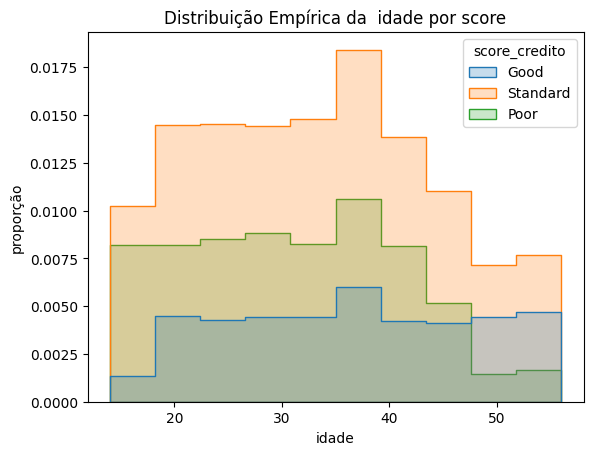

In [17]:
sns.histplot(data=clientes, x='idade', hue='score_credito', element='step', kde=False,stat='density',bins = 10)
plt.title('Distribuição Empírica da  idade por score')
plt.xlabel('idade')
plt.ylabel('proporção')
plt.show()

Vemos acima as distribuições empíricas das idades por categoria do score. Vemos que os indíviduos com score poor, se encontrar em uma faixa abaixo de 45 anos, enquanto que as pessoas acima dessa idade são em maioria com score bom ou padrão.

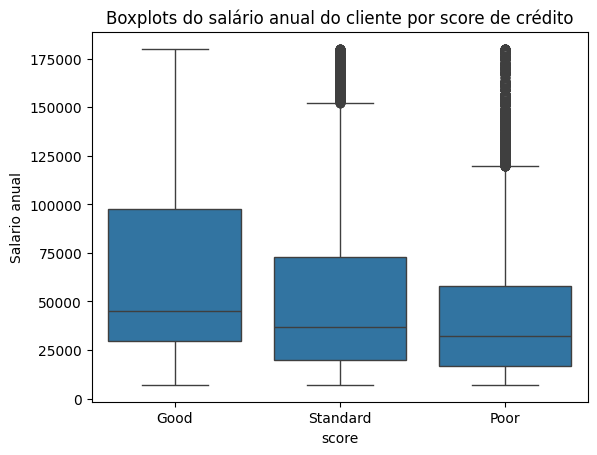

In [14]:
sns.boxplot(x='score_credito', y='salario_anual', data=clientes)
plt.title('Boxplots do salário anual do cliente por score de crédito')
plt.xlabel('score')
plt.ylabel('Salario anual')
plt.show()

Os boxplots do salário anuan da pessoal em cada score de credito, mostra uma tendência decrescente da mediana e dos outros quartis, no sentido de pessoas com bom score de crédito apresentam maiores salários anuais, embora haja uma intersecção grande entre os salários e scores.

Vemos que os scores padrão e ruim apresentam muitos pontos discrepantes.

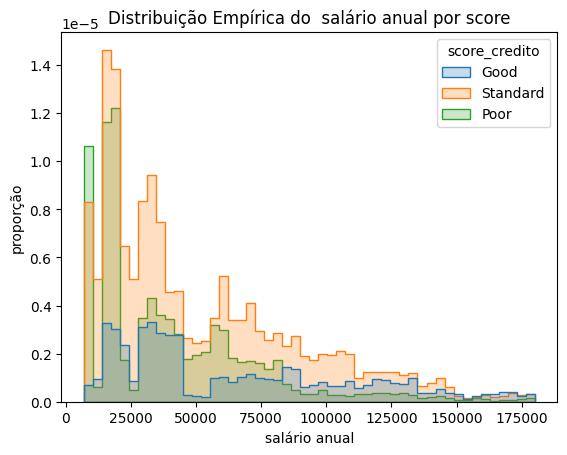

In [26]:
sns.histplot(data=clientes, x='salario_anual', hue='score_credito', element='step', kde=False,stat='density',bins=50)
plt.title('Distribuição Empírica do  salário anual por score')
plt.xlabel('salário anual')
plt.ylabel('proporção')
plt.show()

Vemos por meio desse gráfico que pessoas com uma baixa renda salarial anual, parecem estar dispostos no score de crédito padrão e ruim, em sua maioria. Mas vemos também que, apesar de a maioria das pessoas de mais alta renda serem em sua maioria pessoas de score bom, a maioria das pessoas de score bom ainda se encontram em faixas salarias pequenas.

In [37]:
clientes = clientes.drop('id_cliente',axis=1)

In [39]:
2+2

4

In [40]:
7+7

14

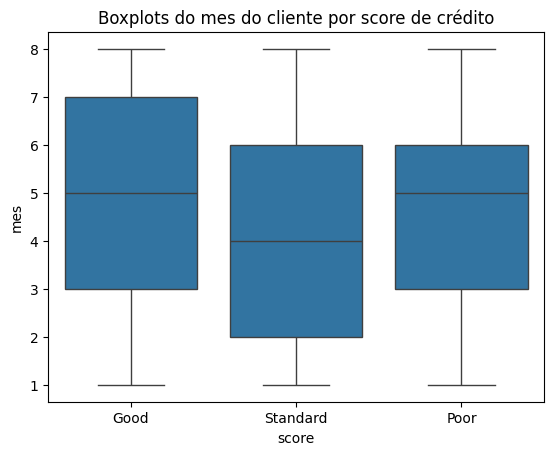

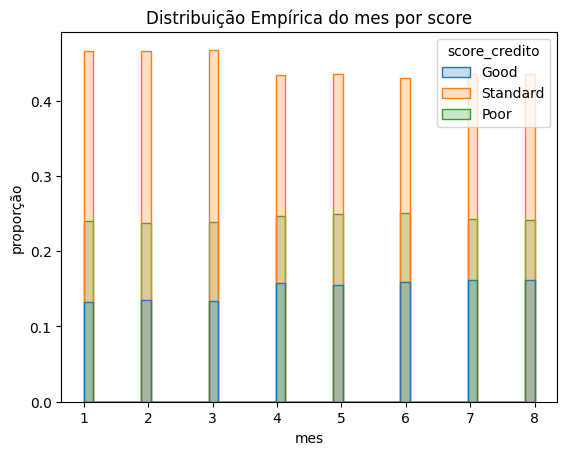

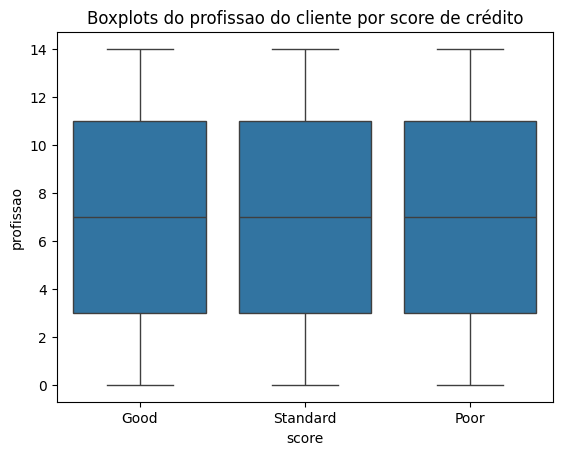

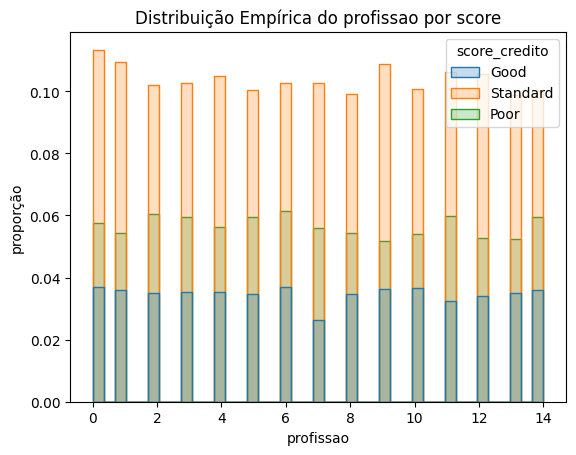

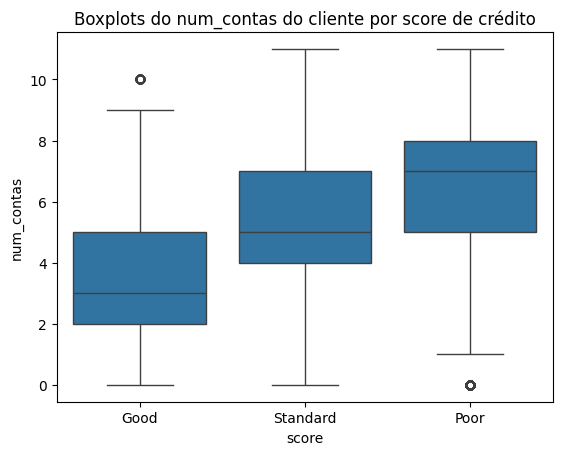

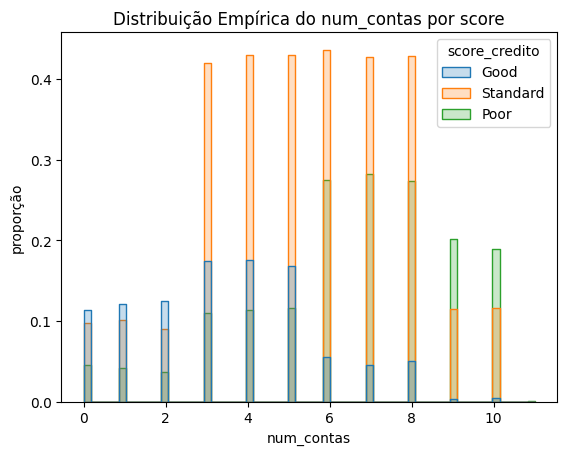

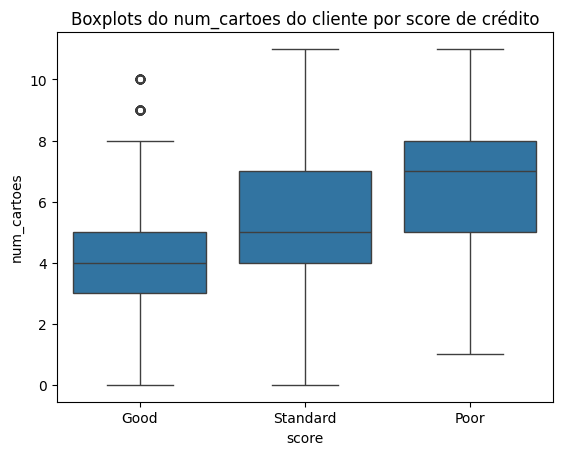

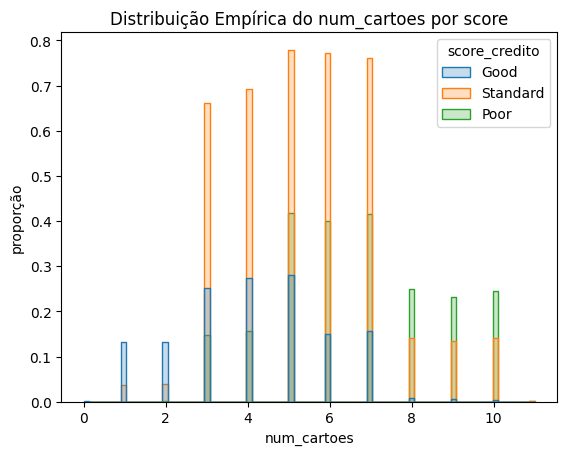

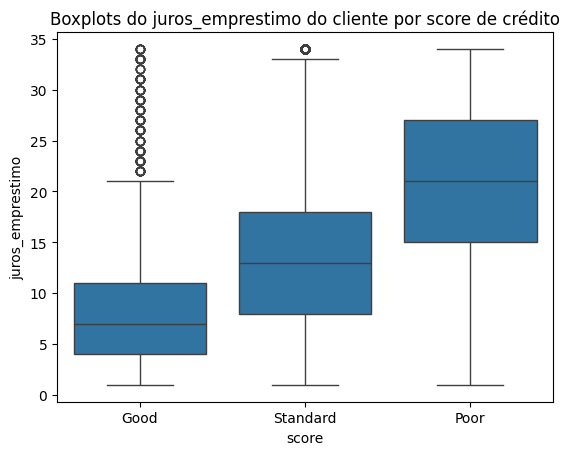

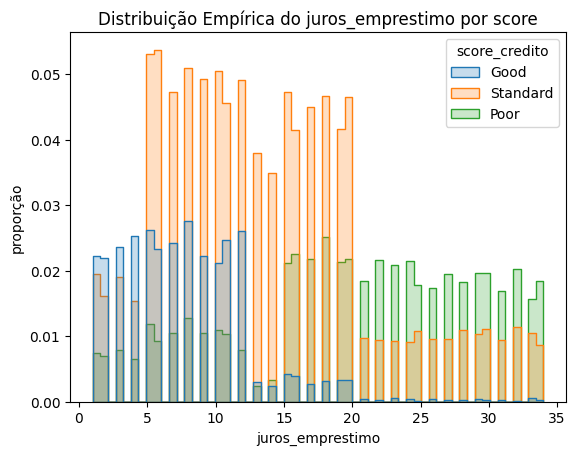

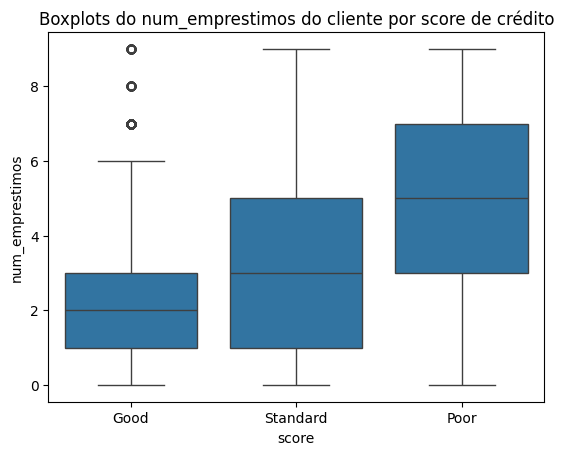

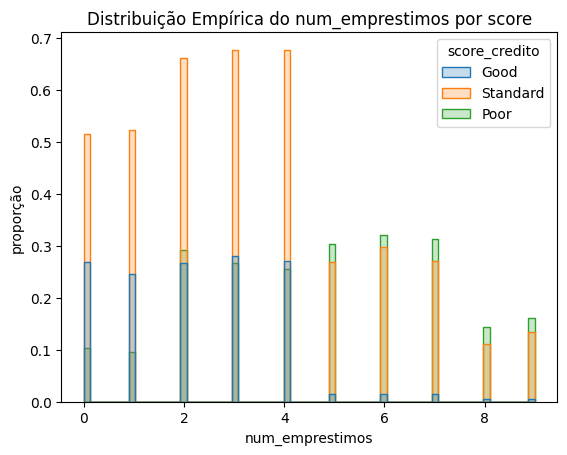

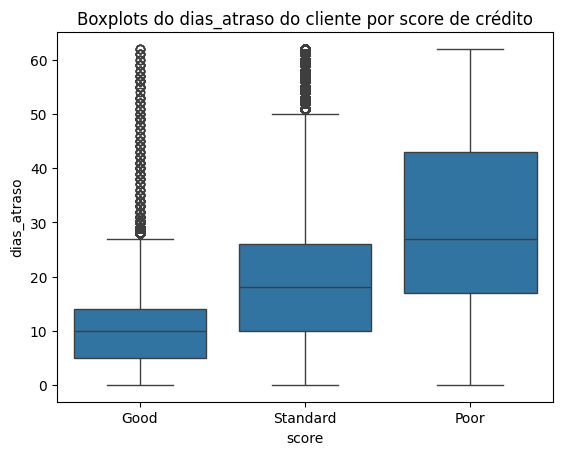

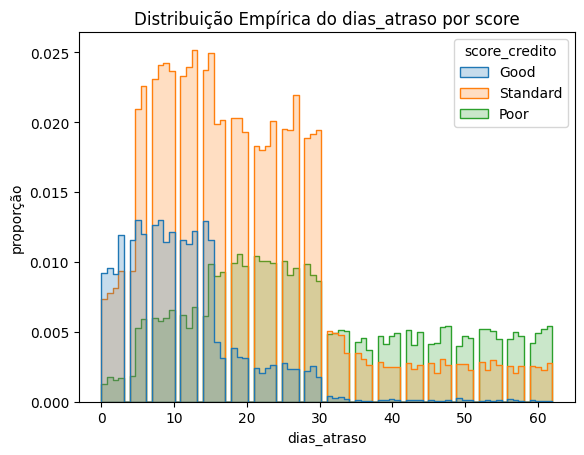

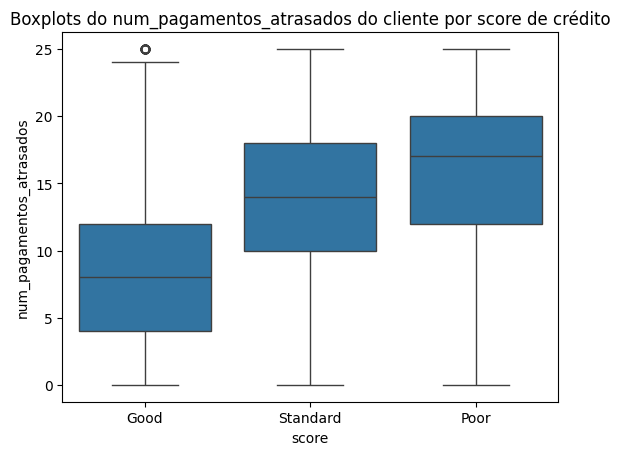

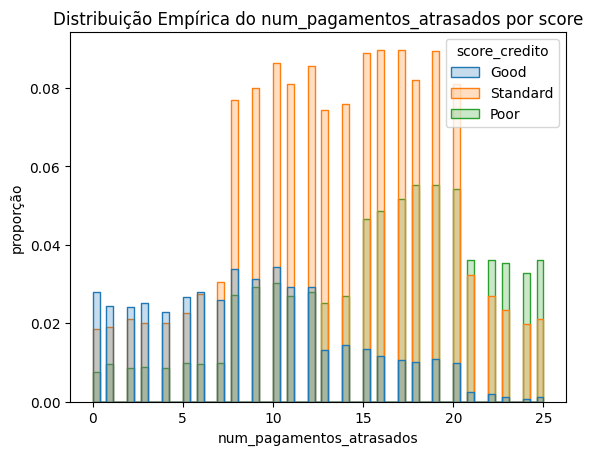

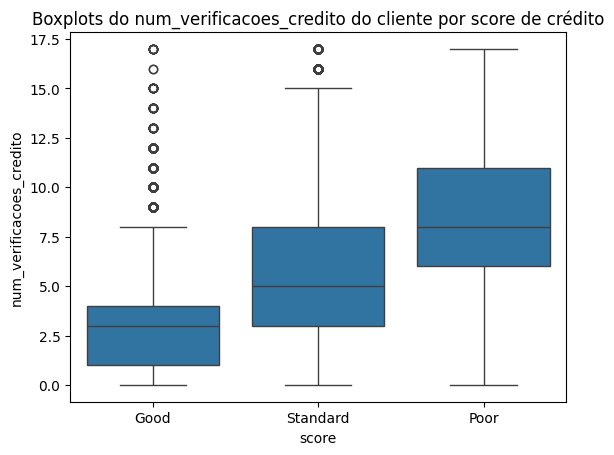

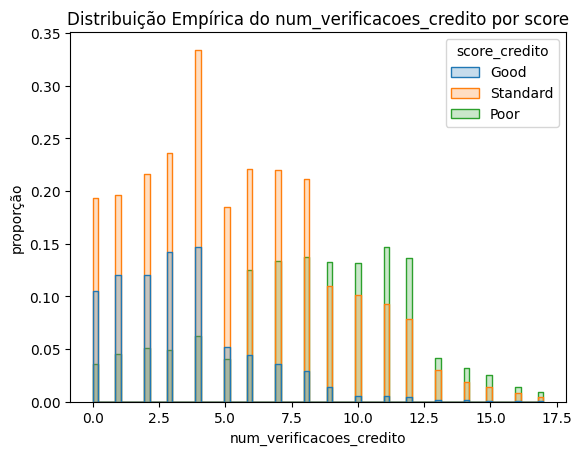

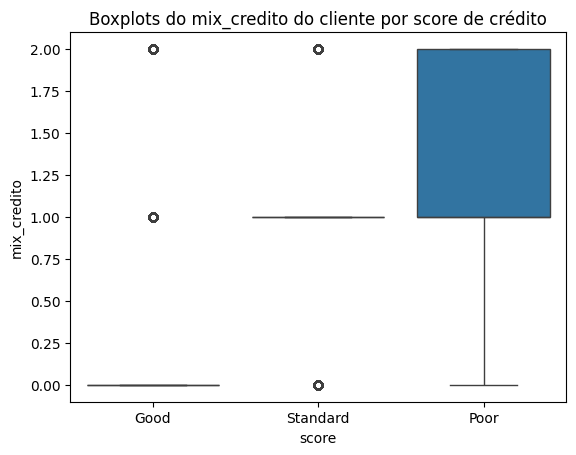

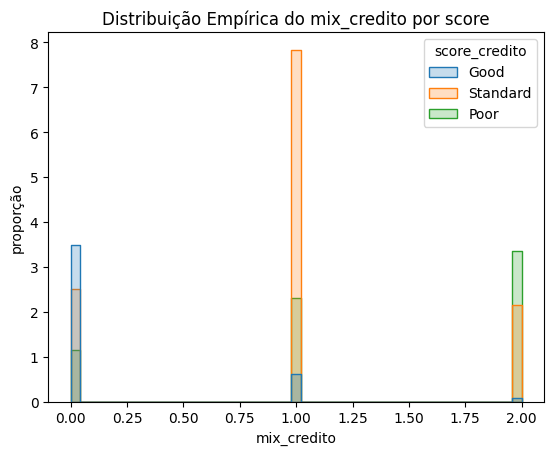

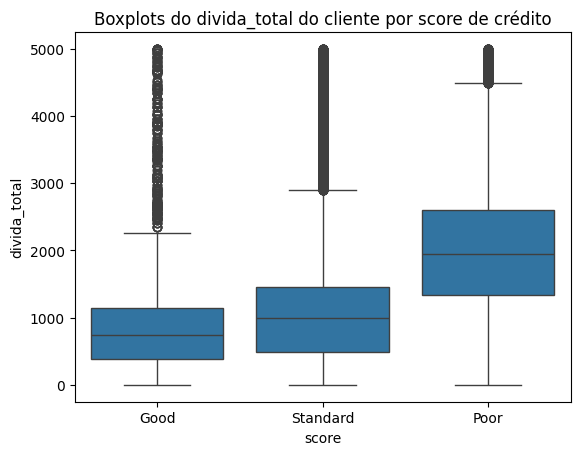

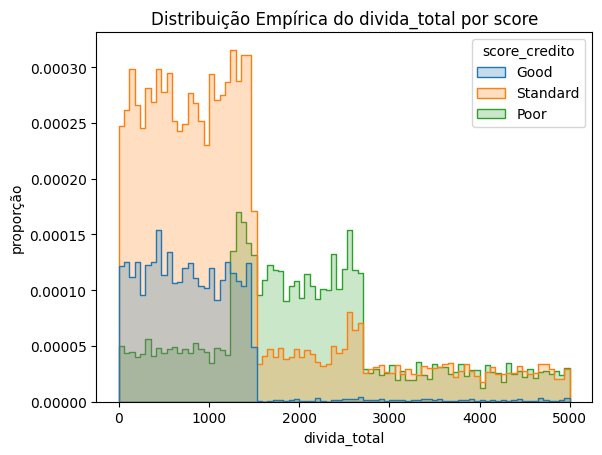

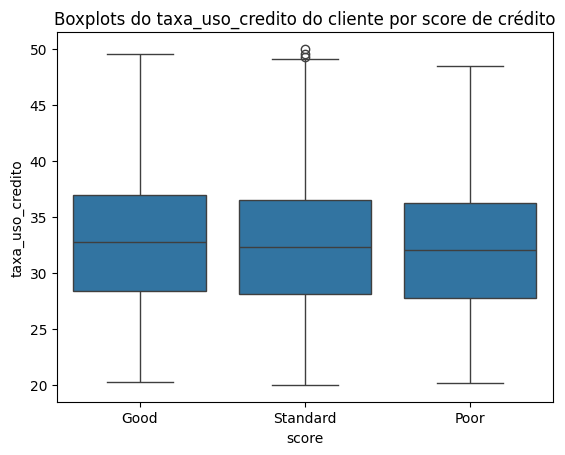

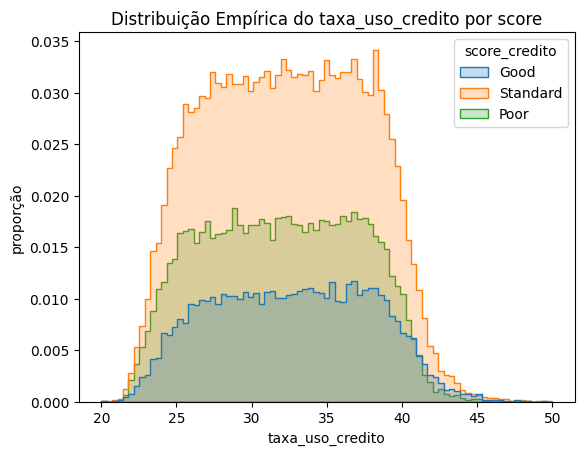

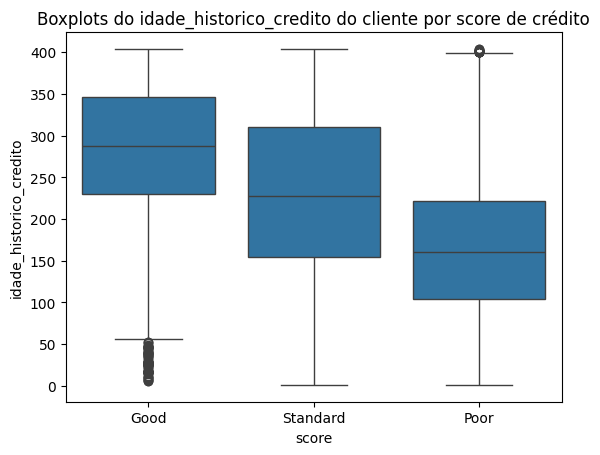

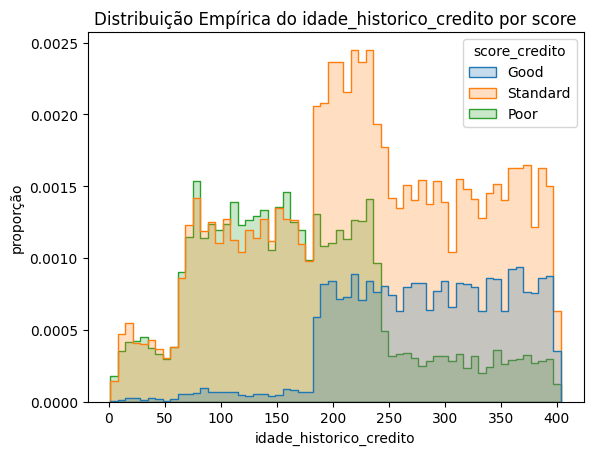

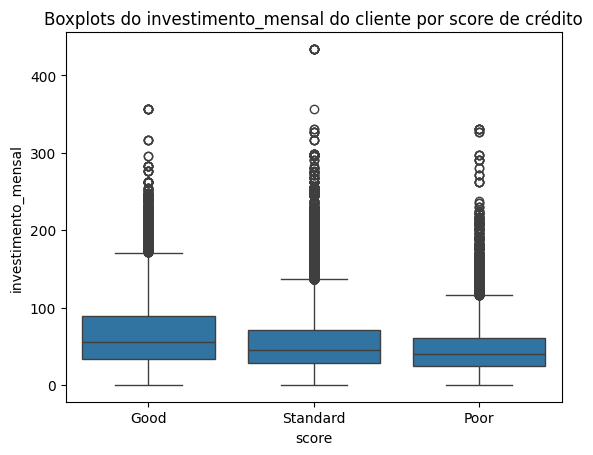

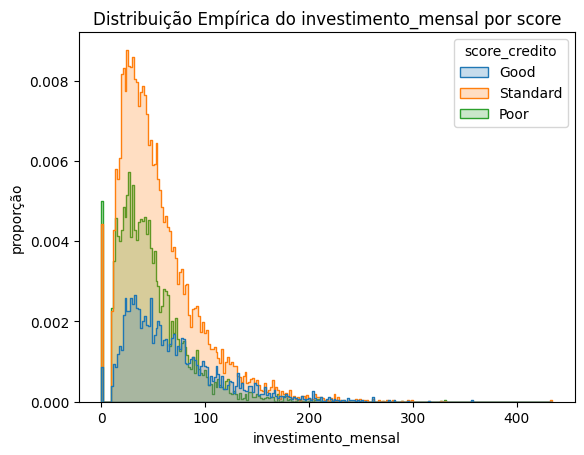

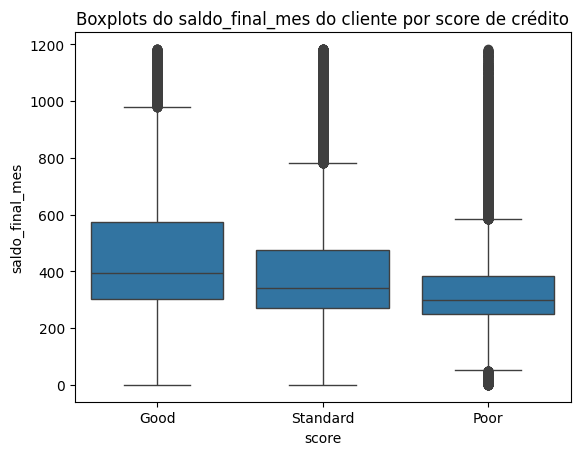

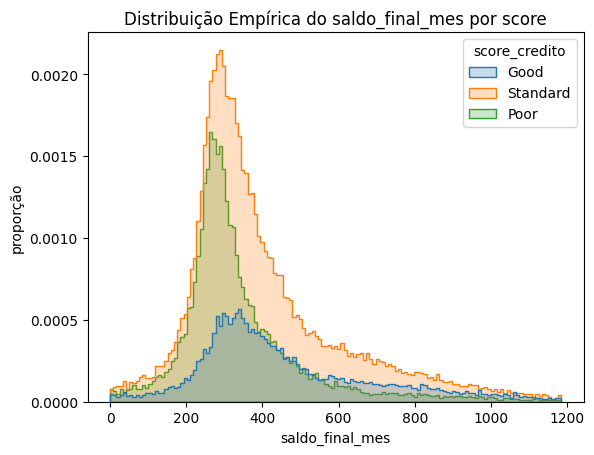

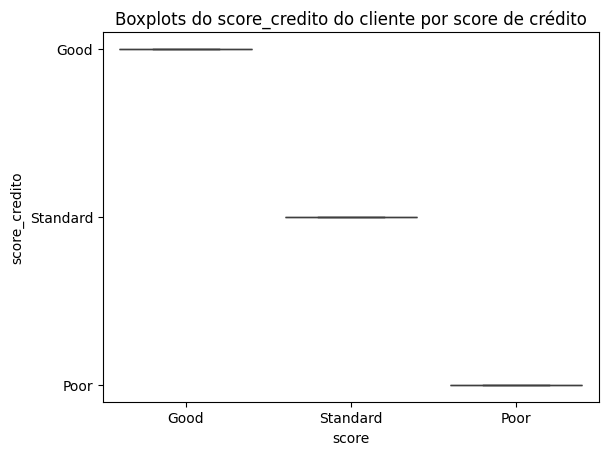

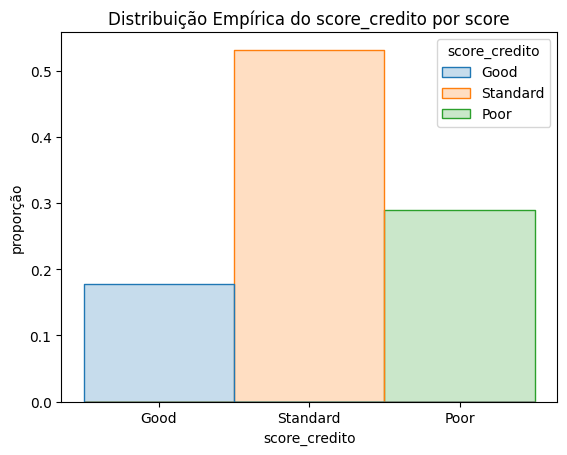

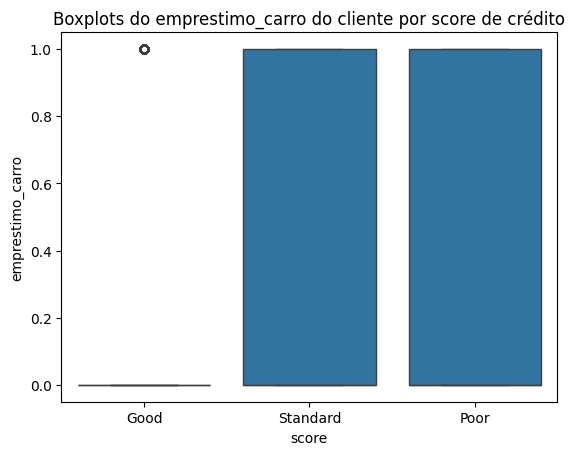

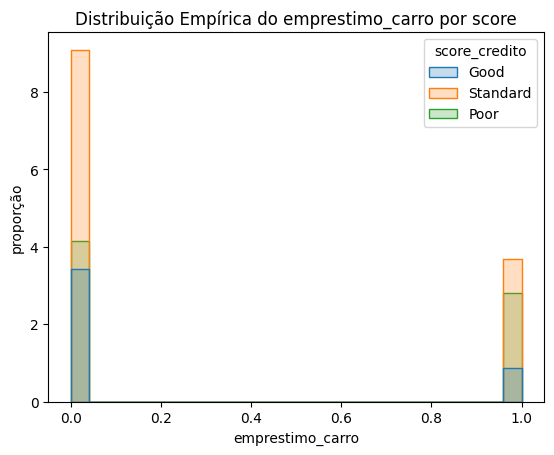

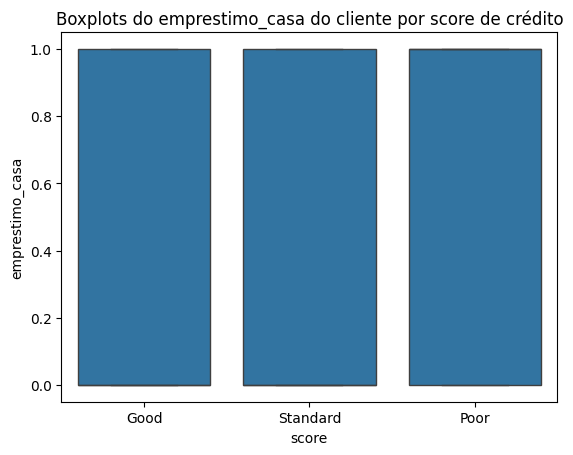

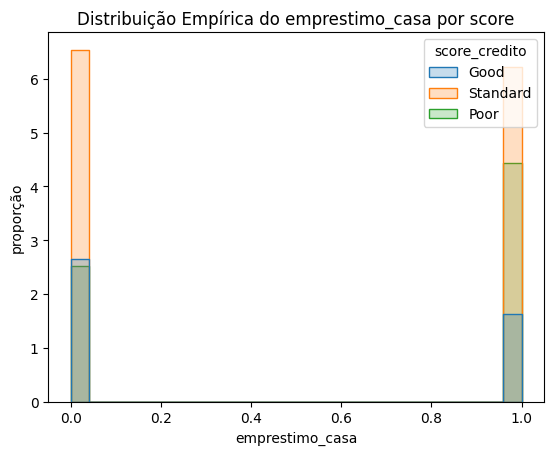

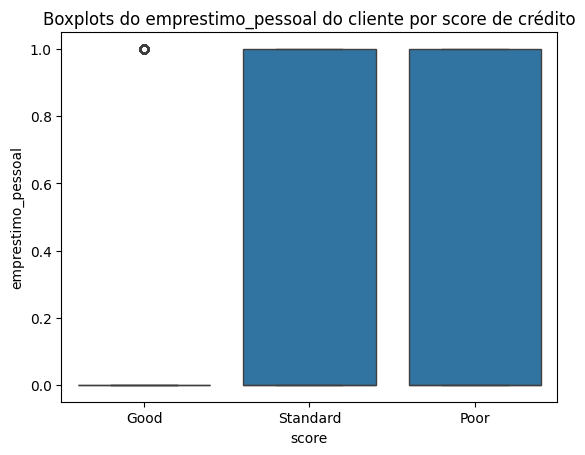

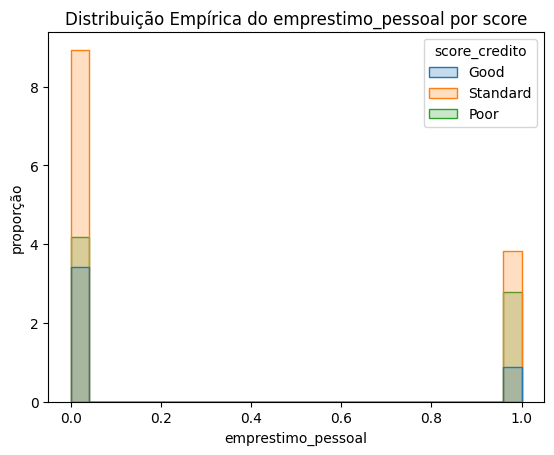

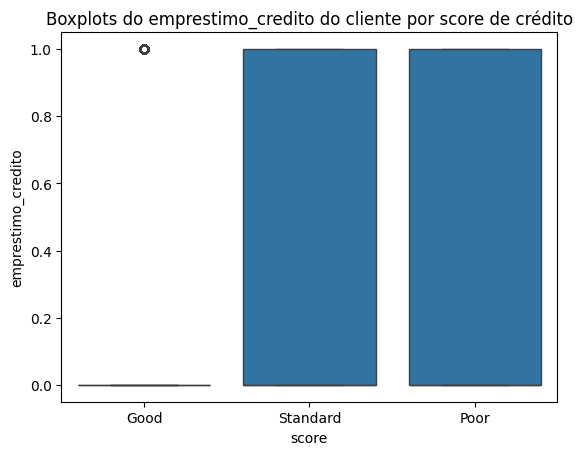

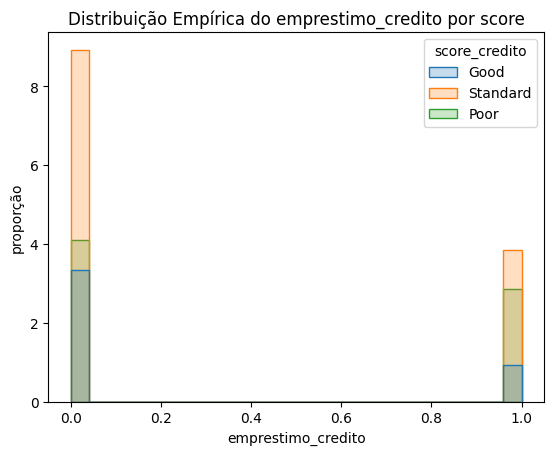

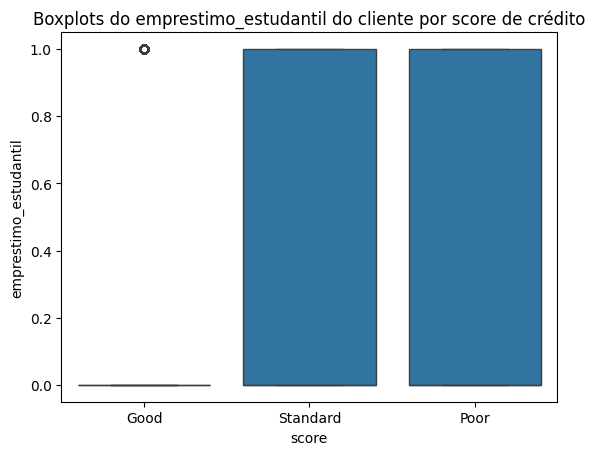

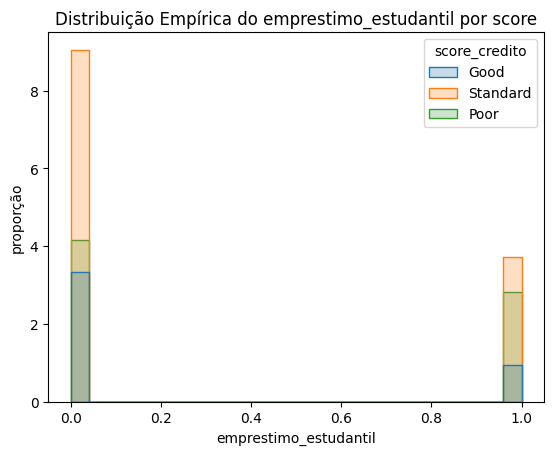

In [41]:
lst = ['profissao, mix_credito','comportamento_pagamento','idade','salario_anual']
#clientes = clientes.drop('id_clientes',axis=1)

for coluna in clientes:
  if coluna not in lst:
    sns.boxplot(x='score_credito', y=coluna, data=clientes)
    plt.title(f'Boxplots do {coluna} do cliente por score de crédito')
    plt.xlabel('score')
    plt.ylabel(f'{coluna}')
    plt.show()

    sns.histplot(data=clientes, x=coluna, hue='score_credito', element='step', kde=False,stat='density')
    plt.title(f'Distribuição Empírica do {coluna} por score')
    plt.xlabel(f'{coluna}')
    plt.ylabel('proporção')
    plt.show()

As informações mais básicas e essenciais sobre a parte de análise de dados se encontra acima

In [42]:
pd.options.display.max_columns = 25
clientes

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,0,809.98,26.822620,265.0,21.465380,1,312.494089,Good,1,1,1,1,0
1,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,4.0,0,809.98,31.944960,266.0,21.465380,3,284.629162,Good,1,1,1,1,0
2,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,0,809.98,28.609352,267.0,21.465380,5,331.209863,Good,1,1,1,1,0
3,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,0,809.98,31.377862,268.0,21.465380,4,223.451310,Good,1,1,1,1,0
4,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,4.0,0,809.98,24.797347,269.0,21.465380,2,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,11,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,3.0,0,502.38,34.663572,378.0,24.028477,0,479.866228,Poor,1,0,0,0,1
99996,5,25.0,11,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,3.0,0,502.38,40.565631,379.0,24.028477,2,496.651610,Poor,1,0,0,0,1
99997,6,25.0,11,39628.99,4.0,6.0,7.0,2.0,27.0,6.0,3.0,0,502.38,41.255522,380.0,24.028477,0,516.809083,Poor,1,0,0,0,1
99998,7,25.0,11,39628.99,4.0,6.0,7.0,2.0,20.0,6.0,3.0,0,502.38,33.638208,381.0,24.028477,3,319.164979,Standard,1,0,0,0,1


In [43]:
#Passo 5 breve análise do perfil dos clientes

#Abaixo, uma lista que de para colocar faixa de valores
lista = ['idade','salario_anual','dias_atraso','divida_total','taxa_uso_credito','idade_historico_credito','investimento_mensal','saldo_final_mes',]

In [109]:
d = {}

#Vamos agora tentar achar as melhores faixas de valores, e piores também, ou seja as faixas onde se encontram a maior proporção de pessoas com bom score
#e a faixa onde se encontram pessoas com score ruim
import numpy as np

for variavel in lista:
  coluna = clientes[variavel]
  M = coluna.max()
  m = coluna.min()
  faixa = (M-m)/10
  cont =[]
  prop = []
  F = []
  i = m
  while i<=M:
    df = clientes.copy()
    df = df[df[variavel] >= i]
    df = df[df[variavel] <=i+faixa]

    #if df.count() != 0
    cont+=[len(df)]
    prop += [np.sum(df['score_credito']=='Good')/len(df)]
    F += [str(i)+' : '+str(i+faixa)]
    i+=faixa
    if i<=M and i+faixa>M:
      i = M+1
  cont = np.array(cont)
  prop = np.array(prop)
  j = np.argmax(prop)

  d[variavel] = [F[j],cont[j],prop[j]]



<ipython-input-109-64a06e3e1553>:23: RuntimeWarning: invalid value encountered in scalar divide
  prop += [np.sum(df['score_credito']=='Good')/len(df)]


In [108]:
d

{'idade': ['47.599999999999994 : 55.99999999999999',
  10991,
  0.3381857883723046],
 'salario_anual': ['110794.74 : 145391.01', 7064, 0.3364949037372593],
 'dias_atraso': ['0.0 : 12.4', 33436, 0.3440902021772939],
 'divida_total': ['0.23 : 999.798', 42944, 0.27463673621460505],
 'taxa_uso_credito': ['44.0 : 50.0', 344, 0.37209302325581395],
 'idade_historico_credito': ['323.4 : 404.0', 19767, 0.3140587848434259],
 'investimento_mensal': ['347.3528714816254 : 434.1910893520318', 16, 0.4375],
 'saldo_final_mes': ['947.1461088037705 : 1183.9306960885192',
  2532,
  0.32661927330173773]}

O dicionario acima nos da os intervalos nos quais se encontram os maiores percentuais de pessoas com bom score.

Podemos fazer a mesma coisa para o score ruim.

In [110]:
d = {}

#Vamos agora tentar achar as melhores faixas de valores, e piores também, ou seja as faixas onde se encontram a maior proporção de pessoas com bom score
#e a faixa onde se encontram pessoas com score ruim
import numpy as np

for variavel in lista:
  coluna = clientes[variavel]
  M = coluna.max()
  m = coluna.min()
  faixa = (M-m)/10
  cont =[]
  prop = []
  F = []
  i = m
  while i<=M:
    df = clientes.copy()
    df = df[df[variavel] >= i]
    df = df[df[variavel] <=i+faixa]

    #if df.count() != 0
    cont+=[len(df)]
    prop += [np.sum(df['score_credito']=='Poor')/len(df)]
    F += [str(i)+' : '+str(i+faixa)]
    i+=faixa
    if i<=M and i+faixa>M:
      i = M+1
  cont = np.array(cont)
  prop = np.array(prop)
  j = np.argmax(prop)

  d[variavel] = [F[j],cont[j],prop[j]]

<ipython-input-110-a63406e53734>:23: RuntimeWarning: invalid value encountered in scalar divide
  prop += [np.sum(df['score_credito']=='Poor')/len(df)]


In [111]:
d

{'idade': ['14.0 : 18.2', 8295, 0.4141048824593128],
 'salario_anual': ['7005.93 : 24304.065000000002', 33024, 0.3861434108527132],
 'dias_atraso': ['49.60000000000001 : 55.80000000000001',
  3505,
  0.6439372325249644],
 'divida_total': ['1999.366 : 2499.15', 7280, 0.7159340659340659],
 'taxa_uso_credito': ['20.0 : 23.0', 1426, 0.3492286115007013],
 'idade_historico_credito': ['121.89999999999999 : 162.2',
  10361,
  0.5032332786410578],
 'investimento_mensal': ['390.7719804168285 : 434.19108935203167', 0, nan],
 'saldo_final_mes': ['118.40005330714973 : 236.79234694952413',
  11869,
  0.3871429775044233]}

In [116]:
#Dividir em base de treino e test

x = clientes.drop(["score_credito"], axis=1) #Armazena as covariáveis
y = clientes["score_credito"] #Armazena a variável resposta

from sklearn.model_selection import train_test_split

#Separamos os dados em treino e teste. Treino vamos dar para os modelos aprenderem e teste vamos usar para ver se o modelo aprendeu corretamente
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


modelo_arvore = RandomForestClassifier() # modelo arvore de decisao, com random forest
modelo_knn = KNeighborsClassifier() # modelo do KNN (nearest neighbors - vizinhos mais proximos)
model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs') # modelo de regressão logística multinomial



# treinando os modelos
modelo_arvore.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)
model_multinomial.fit(x_treino, y_treino)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [118]:
#A regressão logística multinomial não foi ajustada
from sklearn.metrics import accuracy_score

# calculamos as previsoes
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste.to_numpy())


# comparamos as previsoes com o y_teste
# esse score queremos o maior (maior acuracia, mas tb tem que ser maior do que o chute de tudo Standard)
print(accuracy_score(y_teste, previsao_arvore))
print(accuracy_score(y_teste, previsao_knn))




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8265333333333333
0.7324


A arvore de decisão se mostro mais precisa para a predição no conjunto de teste.

In [119]:
#A seguir, faremos a previsão nos novos clientes
# fazendo novas previsões
novos_clientes = pd.read_csv("novos_clientes.csv")
display(novos_clientes)

for coluna in novos_clientes.columns:
    if novos_clientes[coluna].dtype == "object" and coluna != "score_credito":
        novos_clientes[coluna] = codificador.fit_transform(novos_clientes[coluna])

previsoes = modelo_arvore.predict(novos_clientes)
print(previsoes)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,empresario,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,7.0,Ruim,2430.21,29.934186,218.0,44.50951,baixo_gasto_pagamento_baixo,312.487689,1,1,0,0,0
1,4,32.0,advogado,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,7.0,Normal,569.80,28.819407,12.0,0.00000,baixo_gasto_pagamento_medio,300.994163,0,0,0,0,1
2,2,48.0,empresario,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,3.0,Normal,614.60,34.235853,215.0,0.00000,baixo_gasto_pagamento_alto,345.081577,0,1,0,1,0


['Poor' 'Good' 'Good']


In [120]:
display(novos_clientes)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,1,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,7.0,1,2430.21,29.934186,218.0,44.50951,1,312.487689,1,1,0,0,0
1,4,32.0,0,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,7.0,0,569.80,28.819407,12.0,0.00000,2,300.994163,0,0,0,0,1
2,2,48.0,1,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,3.0,0,614.60,34.235853,215.0,0.00000,0,345.081577,0,1,0,1,0


Veja que a predição foi ruim, mas isso provavelmente aconteceu porque os comandos acima deram os valores errados para as variáveis do tipo object.

Vamos tentar concertar com base no que foi feito no começo.

In [124]:
novos_clientes['profissao'][0]=5
novos_clientes['profissao'][2]=5
novos_clientes['mix_credito'][0] = 2
novos_clientes['mix_credito'][1] = 1
novos_clientes['mix_credito'][2] = 1
novos_clientes['comportamento_pagamento'][0]=4
novos_clientes['comportamento_pagamento'][1]=5
novos_clientes['comportamento_pagamento'][2]=3



<ipython-input-124-6d35daed097a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novos_clientes['profissao'][0]=5
<ipython-input-124-6d35daed097a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novos_clientes['profissao'][2]=5
<ipython-input-124-6d35daed097a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novos_clientes['mix_credito'][0] = 2
<ipython-input-124-6d35daed097a>:4: SettingWithCopyWarning: 
A value is trying to be set o

In [125]:
display(novos_clientes)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,5,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,7.0,2,2430.21,29.934186,218.0,44.50951,4,312.487689,1,1,0,0,0
1,4,32.0,0,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,7.0,1,569.80,28.819407,12.0,0.00000,5,300.994163,0,0,0,0,1
2,2,48.0,5,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,3.0,1,614.60,34.235853,215.0,0.00000,3,345.081577,0,1,0,1,0


In [126]:
previsoes = modelo_arvore.predict(novos_clientes)
print(previsoes)

['Poor' 'Standard' 'Standard']


Dessa vez as previsões feitas conseguiram acertar as categorias

In [130]:
# quais as caracteristicas mais importantes para definir o score de credito?
colunas = list(x_teste.columns)
importancia = pd.DataFrame(index=colunas, data=modelo_arvore.feature_importances_)
importancia = importancia * 100
print(importancia)

                                  0
mes                        3.905487
idade                      4.210380
profissao                  3.295678
salario_anual              5.118724
num_contas                 3.378720
num_cartoes                4.229709
juros_emprestimo           8.099049
num_emprestimos            2.999306
dias_atraso                6.472654
num_pagamentos_atrasados   4.507336
num_verificacoes_credito   4.767770
mix_credito                9.162678
divida_total              11.336669
taxa_uso_credito           5.061675
idade_historico_credito    7.350097
investimento_mensal        4.858882
comportamento_pagamento    2.369475
saldo_final_mes            5.356404
emprestimo_carro           0.702647
emprestimo_casa            0.733461
emprestimo_pessoal         0.703803
emprestimo_credito         0.690206
emprestimo_estudantil      0.689189
